## 1. Entendimento do Negócio

Um dos problemas enfrentados pelas empresas de telecomunicações é quanto a perda de seus respectivos clientes, chamamos isso de churning (rotatividade). O cliente pode deixar a operadora caso esteja insatisfeito com alguns de seus serviços incluindo preço do contrato, qualidade no atendimento do call-center outros. O problema a resolver aqui é através de um modelo de regressão logística, prever a probabilidade de um cliente deixar a operadora, para antes mesmo disso acontecer, tomar as devidas medidas junto com as áreas gestoras. Problema de classificação com duas categorias: 0. não deixou, 1. deixou.
https://www.kaggle.com/c/customer-churning

## 2. Análise Exploratória

In [1]:
# Carregando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as ply
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import numpy as np
from sklearn.model_selection import GridSearchCV
import os 
import sys
import time
import squarify
import seaborn as sns
import math
from PIL import Image
# para o deploy do modelo
from joblib import dump, load

In [2]:
# Carregando a base de dados
caminhoDataset = 'datasets/projeto4_telecom_treino.csv'
if (os.path.exists(caminhoDataset)):
    clientes = pd.read_csv(caminhoDataset)
else:
    # encerrar o programa
    os.system("echo 'Erro ao carregar a base de dados'")
    time.sleep(5)
    os.system("jupyter notebook stop")

Usando o Qlik Sense para Análise Exploratória. Podemos utilizar também outras ferramentas como, por exemplo, Pandas do Python, PowerBI, R entre outros. 

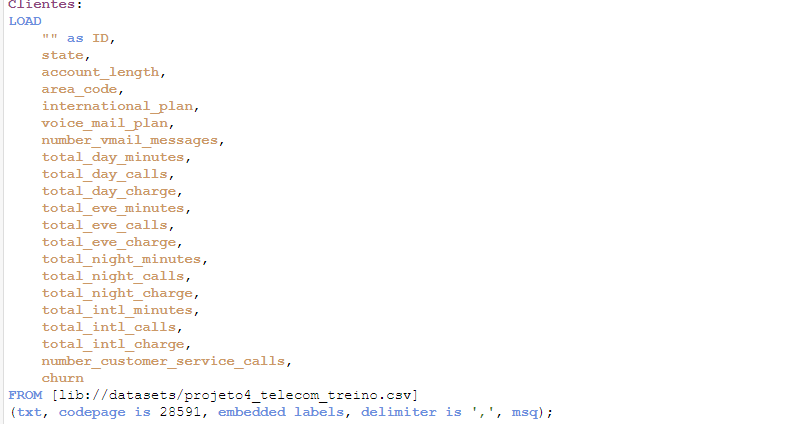

In [3]:
# Nome das colunas, do dataset original sem sofrer transformação
Image.open('imagens/exploracaoClientes3.PNG')

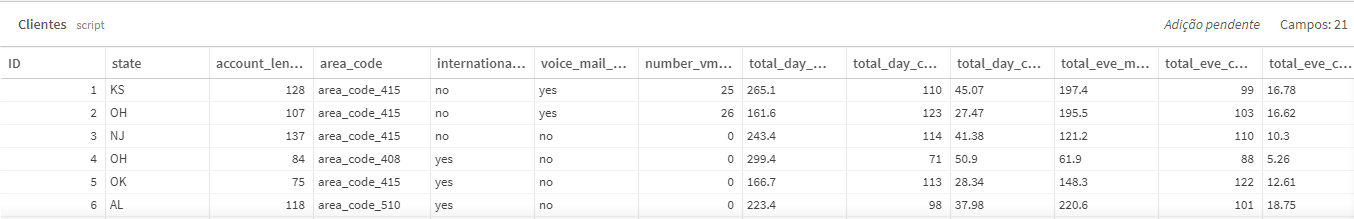

In [4]:
# Visualizando registros, na extração
Image.open('imagens/exploracaoClientes4.PNG')

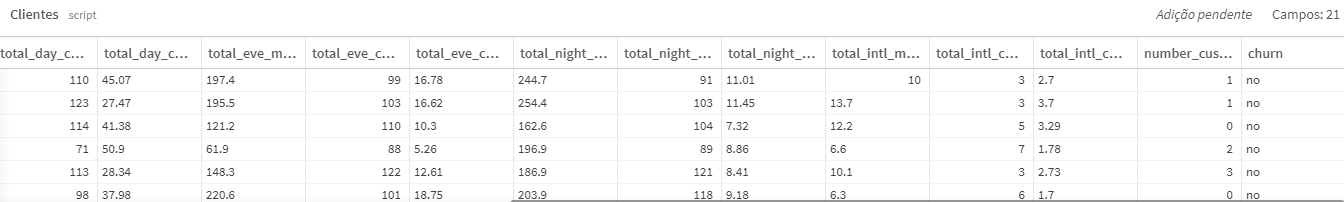

In [5]:
# Visualizando registros, na extração
Image.open('imagens/exploracaoClientes5.PNG')

In [6]:
# Resumo: nome das colunas, tipo de cada uma
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Unnamed: 0                       3333 non-null int64
state                            3333 non-null object
account_length                   3333 non-null int64
area_code                        3333 non-null object
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes           

In [7]:
# Transformação: renomeado a coluna 'unnamed' para 'id'
clientes.rename(columns = {'Unnamed: 0':'id'}, inplace = True)

In [8]:
# Transformação no campo 'area_code', via Python.
clientes.area_code = clientes.area_code.apply(lambda item: item[10:])

In [9]:
type(clientes)

pandas.core.frame.DataFrame

In [10]:
clientes.head(5)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


<b> Transformações via Qlik: </b> <p> </p>
1 - Alteração do nome dos campos para nomes de negócio e não técnicos. <p> </p>
2 - Coluna 'area_code' pegando apenas o valor numérico. <p> </p>
3 - Substituição de valores de yes/no para 'sim' e 'não'.

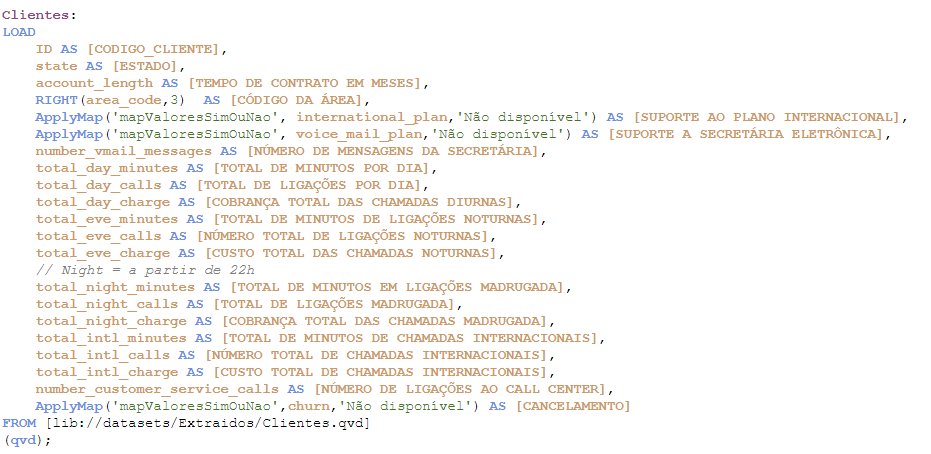

In [11]:
# Script das transformações
Image.open('imagens/exploracaoClientes6.PNG')

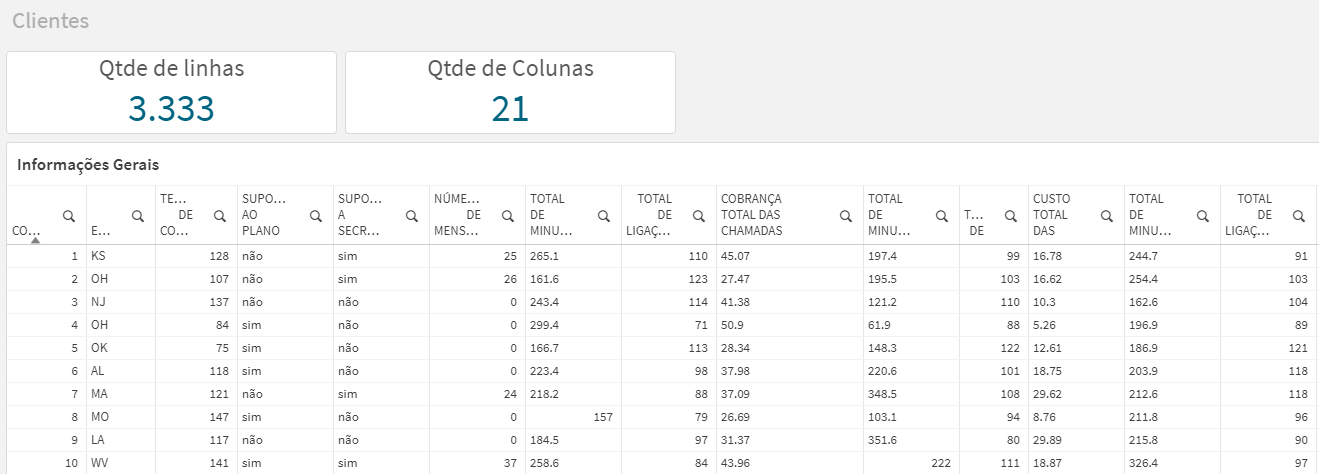

In [12]:
# Visualizando a quantidade de linhas, colunas e alguns registros, após transformação.
Image.open('imagens/exploracaoClientes1.PNG')

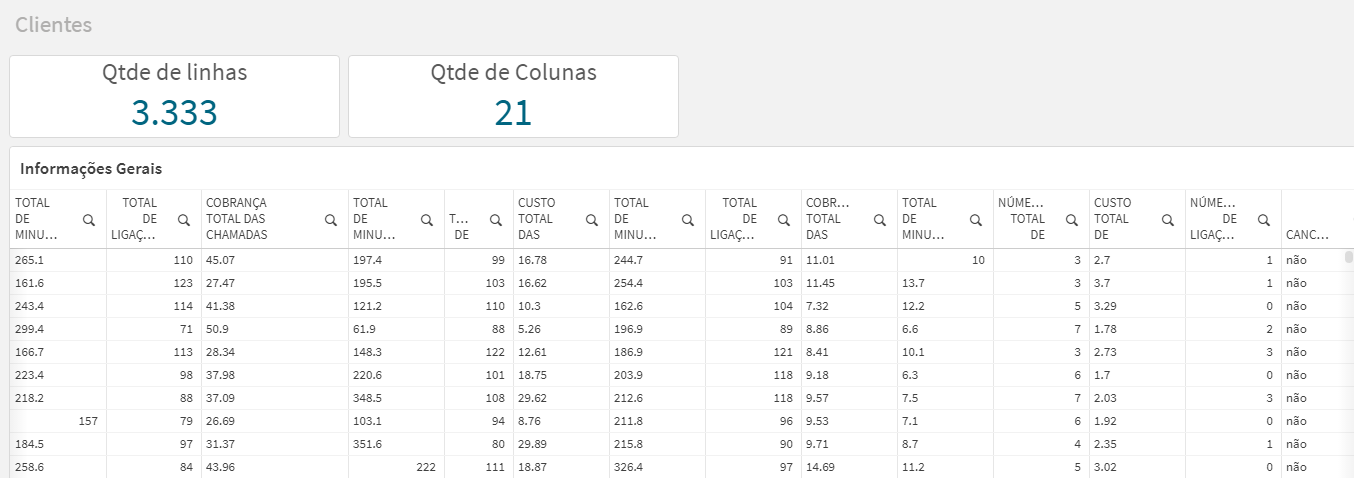

In [13]:
# Continuação da visualizaçaõ dos registros, após transformação
Image.open('imagens/exploracaoClientes2.PNG')

In [14]:
# Convertendo international_plan para valor numérico para preparação do modelo. 
clientes['international_plan'] = clientes['international_plan'].replace("yes",1)
clientes['international_plan'] = clientes['international_plan'].replace("no",0)
clientes['international_plan'] = clientes['international_plan'].astype(int)

In [15]:
clientes['international_plan'].head(4)

0    0
1    0
2    0
3    1
Name: international_plan, dtype: int64

In [16]:
# Convertendo voice_mail_plan para valor numérico para preparação do modelo. 
clientes['voice_mail_plan'] = clientes['voice_mail_plan'].replace("yes",1)
clientes['voice_mail_plan'] = clientes['voice_mail_plan'].replace("no",0)
clientes['voice_mail_plan'] = clientes['voice_mail_plan'].astype(int)

In [17]:
# Verificando se existem valores missing
clientes[clientes.isna().any(axis = 1)]

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [18]:
# Verificando novamente o dataset após transformações
clientes.head(5)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,415,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,415,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,415,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,408,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,415,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


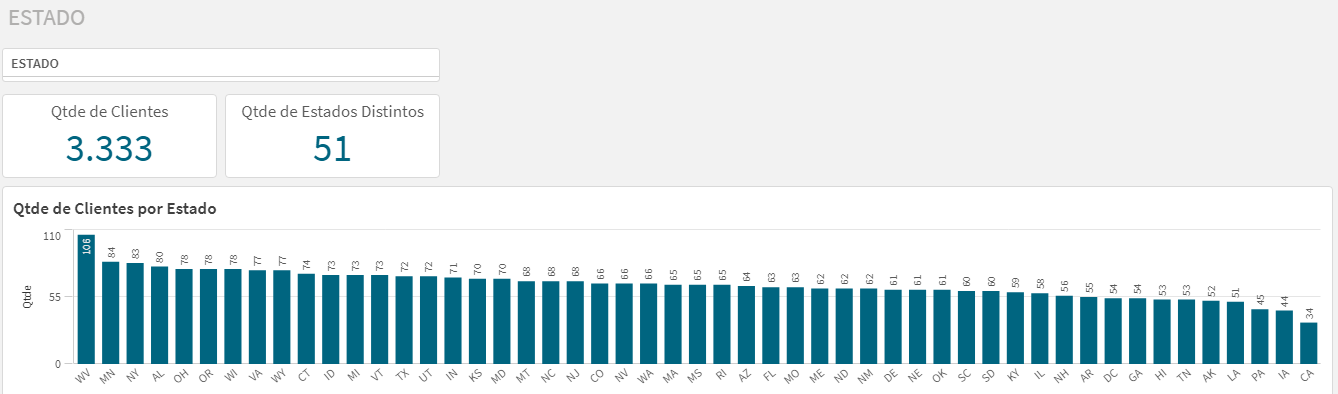

In [19]:
# Exploração da variável categórica 'STATE'
# Visualizando a quantidade de estados distintos e quantidade de clientes por Estado.
# Consegue encontrar o estado que possui mais clientes.
Image.open('imagens/exploracaoClientes7.PNG')

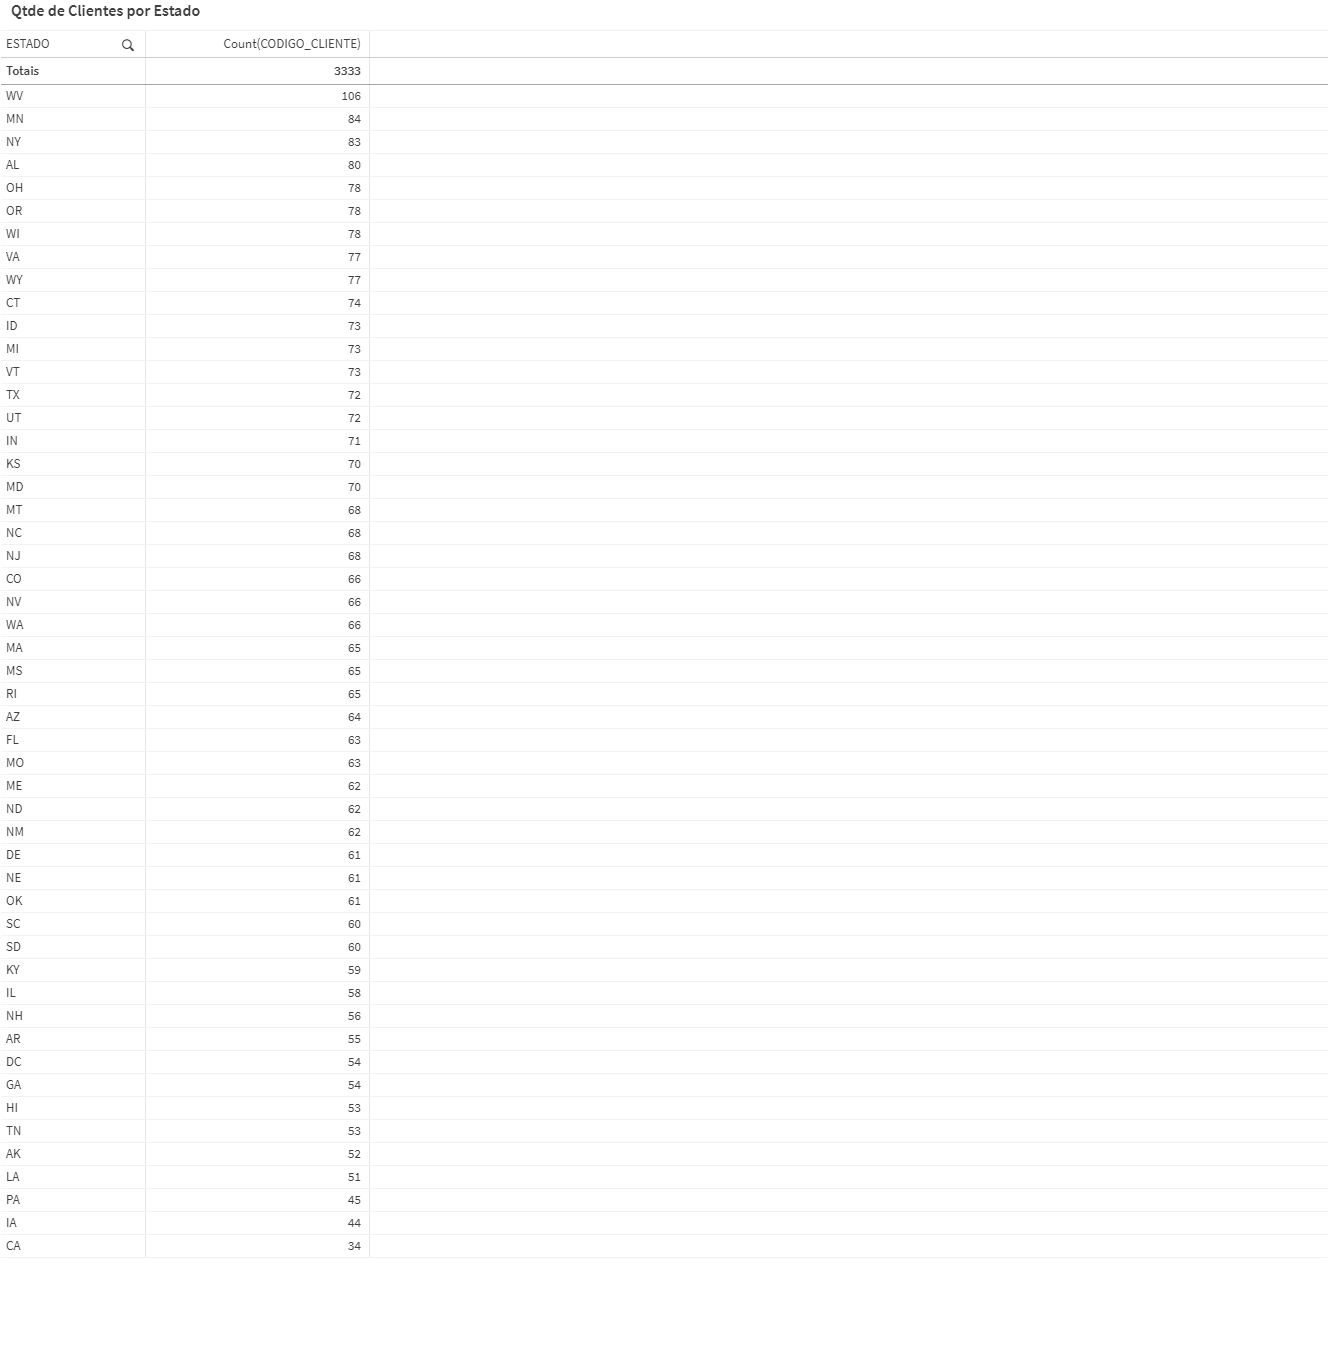

In [20]:
# Tabela com quantidade de clientes agrupado por estado
Image.open('imagens/exploracaoClientes8.png')

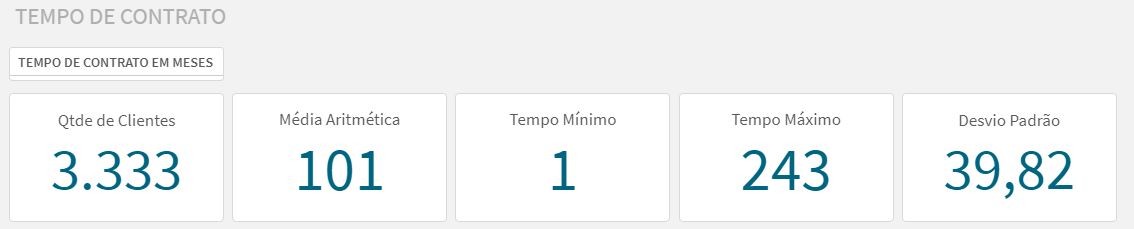

In [21]:
# Exploração da variável account_length
# Resumo Estatístico Rápido.
Image.open('imagens/exploracaoClientes9.PNG')

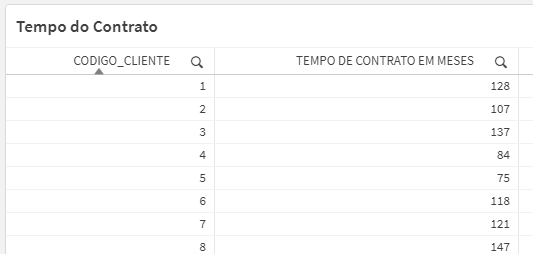

In [22]:
# Visualizando alguns registros
Image.open('imagens/exploracaoClientes10.PNG')

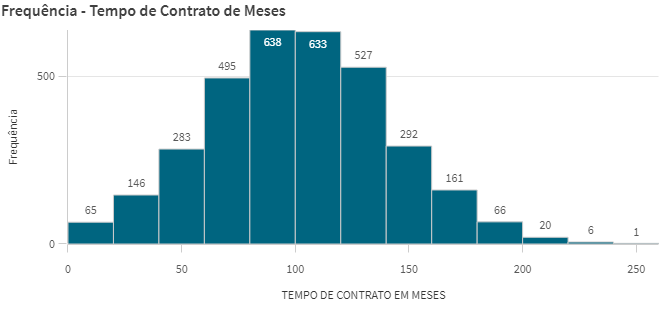

In [23]:
# Histograma
Image.open('imagens/exploracaoClientes11.png')

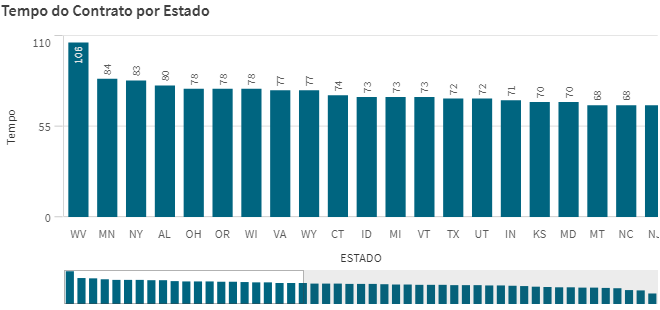

In [24]:
# Tempo de Contrato por Estado
Image.open('imagens/exploracaoClientes12.png')

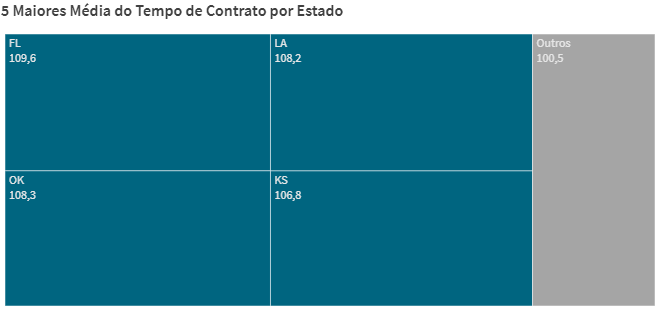

In [25]:
# 5 Maiores Médias do Tempo de Contrato por Estado
Image.open('imagens/exploracaoClientes13.png')

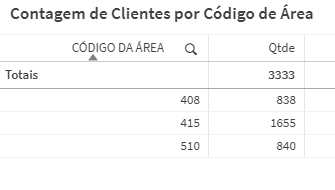

In [26]:
# Exploração da variável categórica 'area Code'
# Agrupamento da quantidade de clientes pelo código da área.
Image.open('imagens/exploracaoClientes14.png')

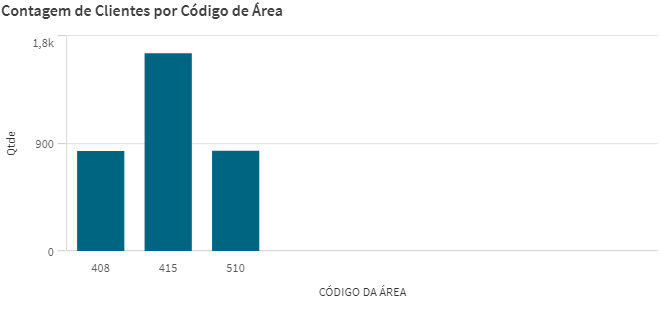

In [27]:
# Gráfico de barras
Image.open('imagens/exploracaoClientes15.png')

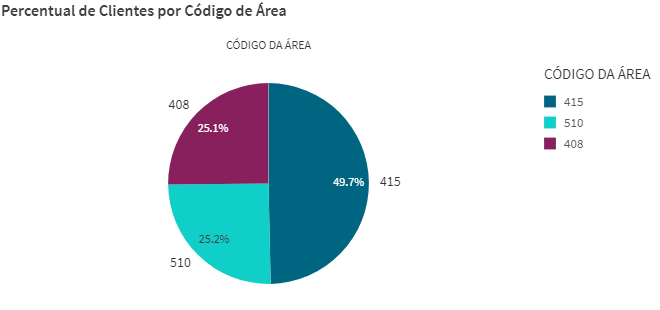

In [28]:
# Gráfico de pizza
Image.open('imagens/exploracaoClientes16.png')

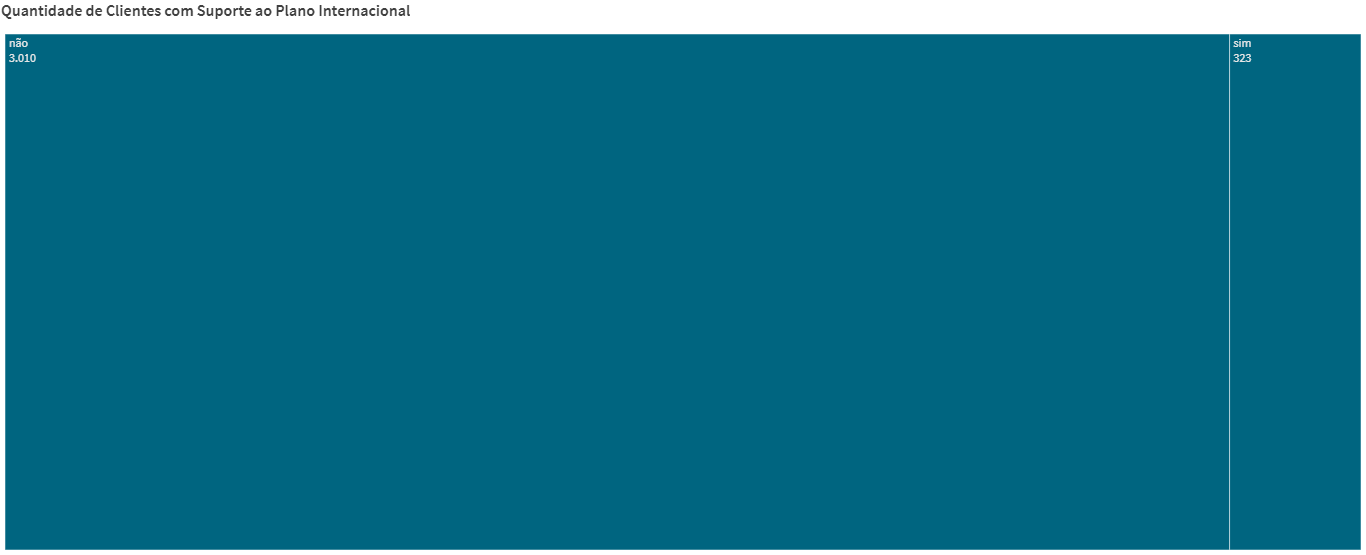

In [29]:
# Exploração da varíavel categórica international_plan com apenas 2 possíveis valores.
# Tree Map mostrando as quantidades
Image.open('imagens/exploracaoClientes17.png')

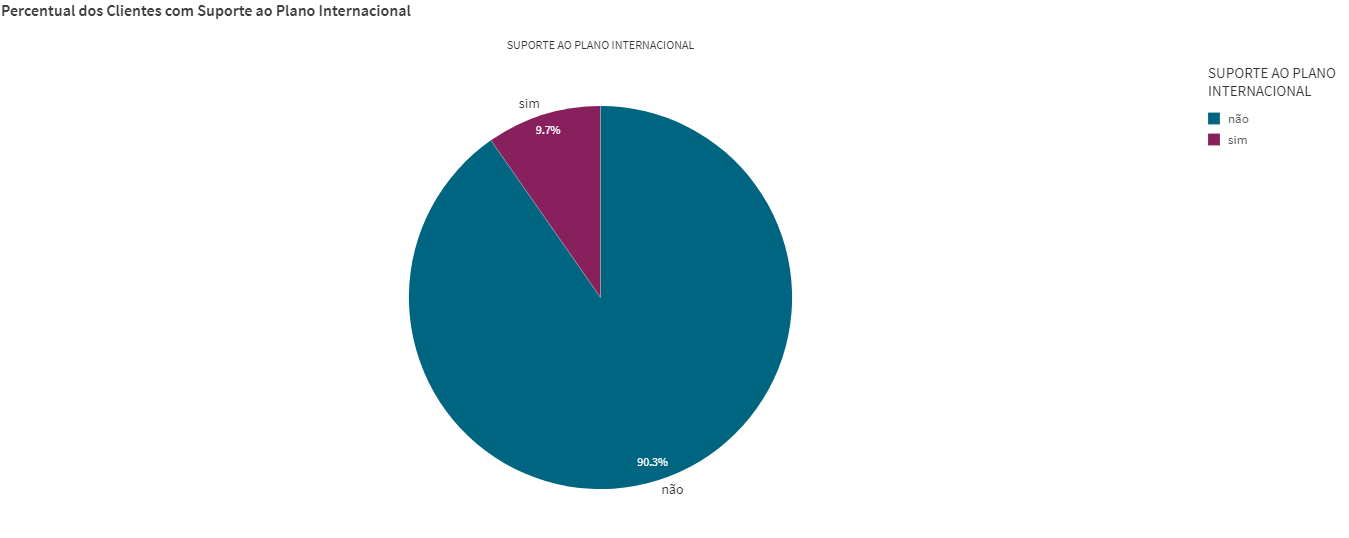

In [30]:
# Gráfico de pizza mostrando os percentuais de cada categoria
Image.open('imagens/exploracaoClientes18.png')

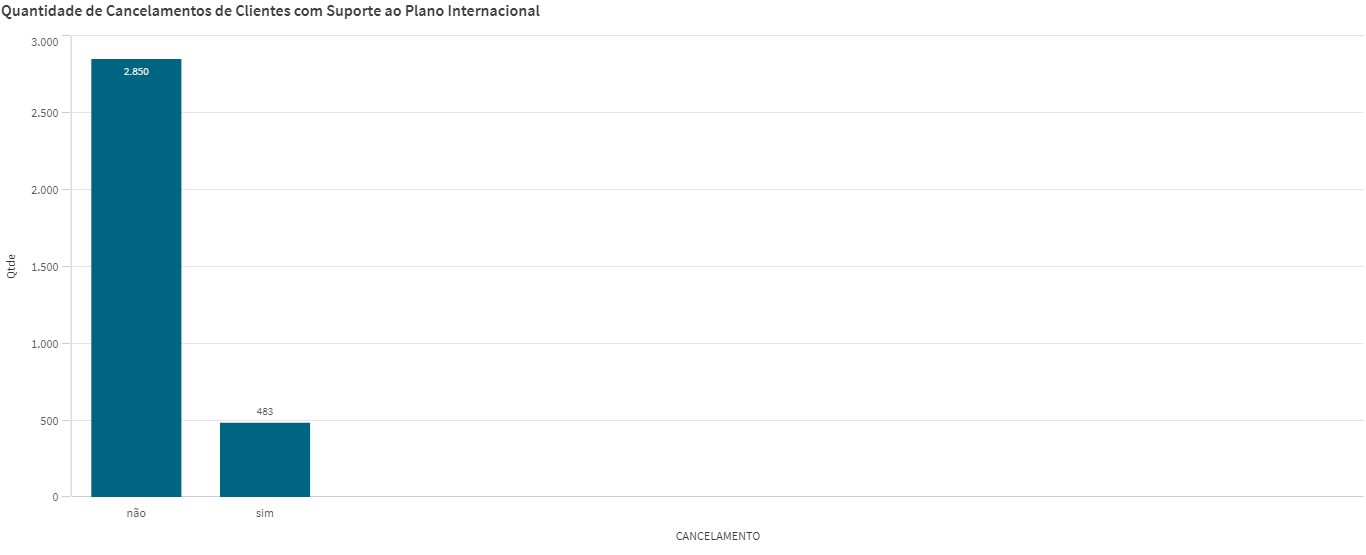

In [31]:
# Gráfico de barras: cancelamentos x suporte ao plano internacional.
Image.open('imagens/exploracaoClientes19.png')

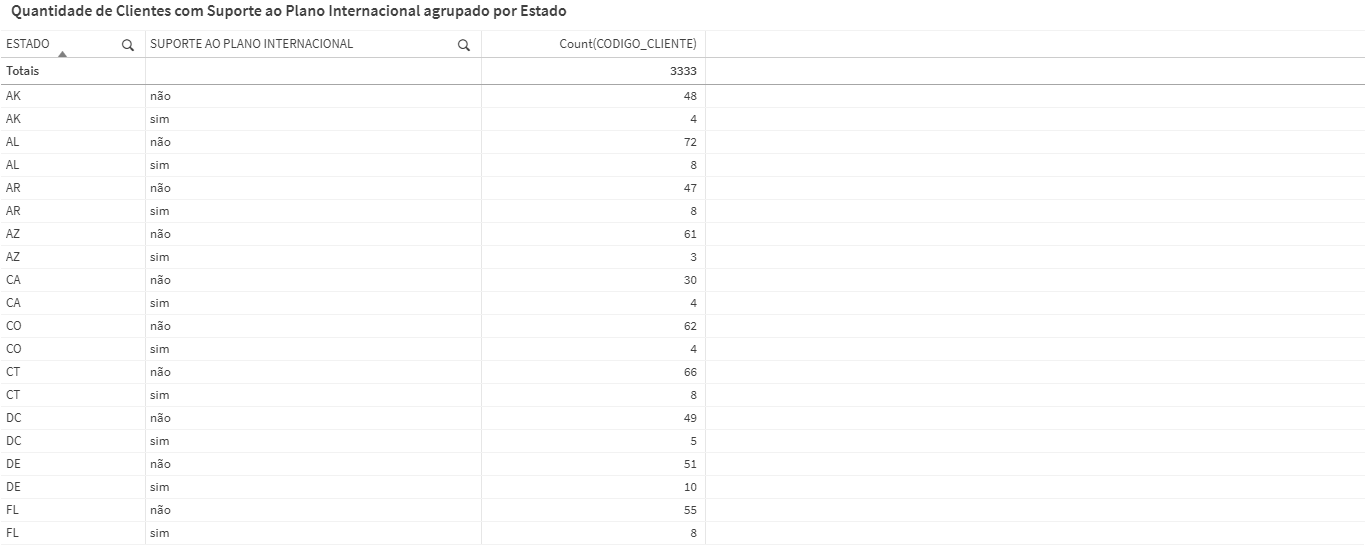

In [32]:
Image.open('imagens/exploracaoClientes20.png') 

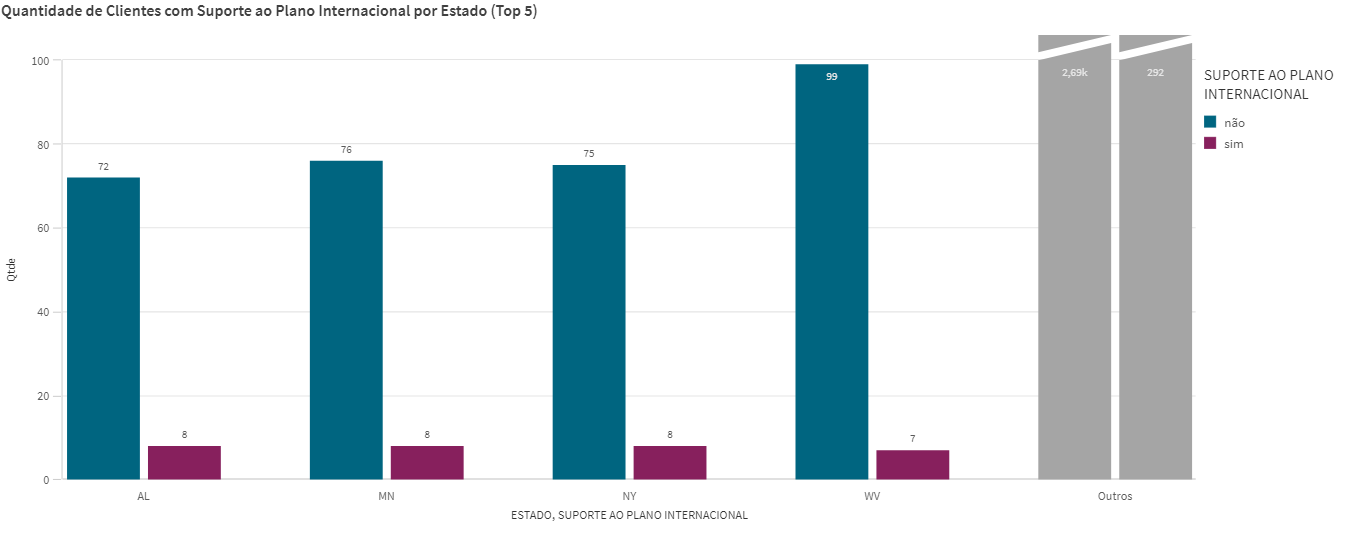

In [33]:
Image.open('imagens/exploracaoClientes21.png')

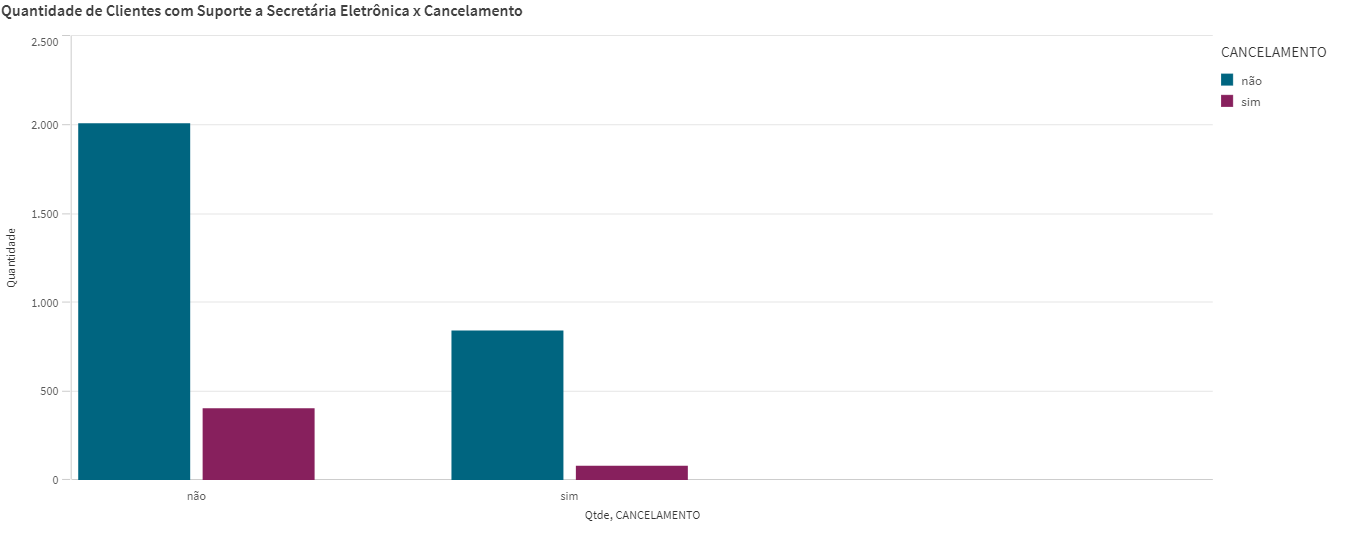

In [34]:
# Exploração da variável categória "voice_mail_plan", que é 'SUPORTE A SECRETÁRIA ELETRÔNICA'
# Gráfico de barras suporte a secretária eletrônica x cancelamento
Image.open('imagens/exploracaoClientes22.png')

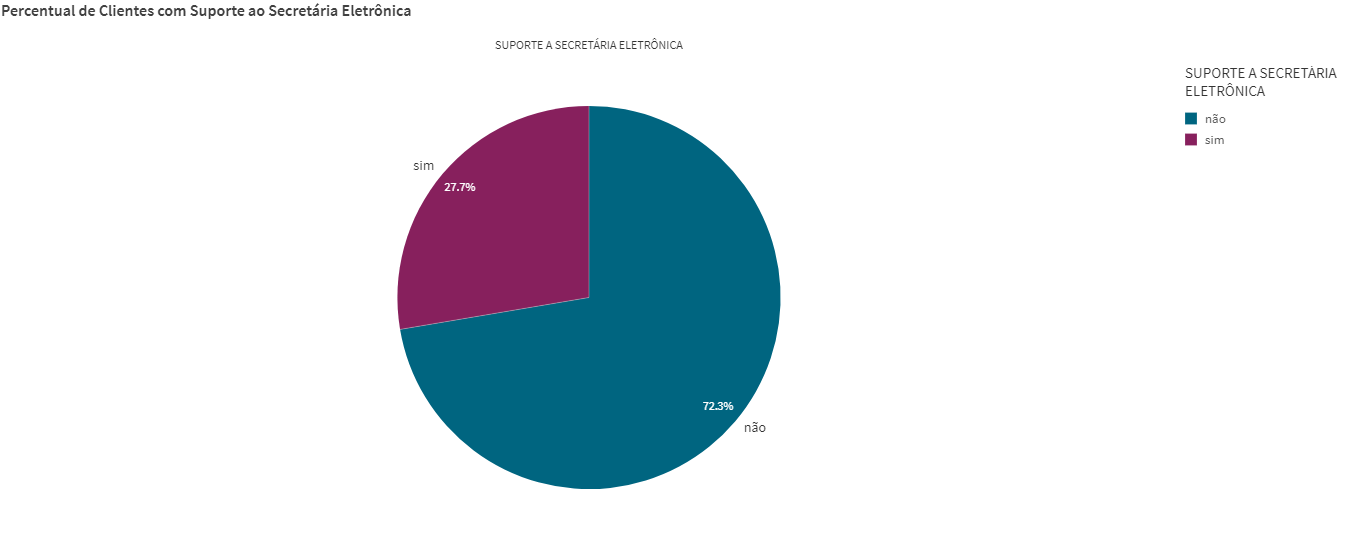

In [35]:
# Gráfico de pizza percentual de clientes com suporte a secretária eletrônica
Image.open('imagens/exploracaoClientes23.png')

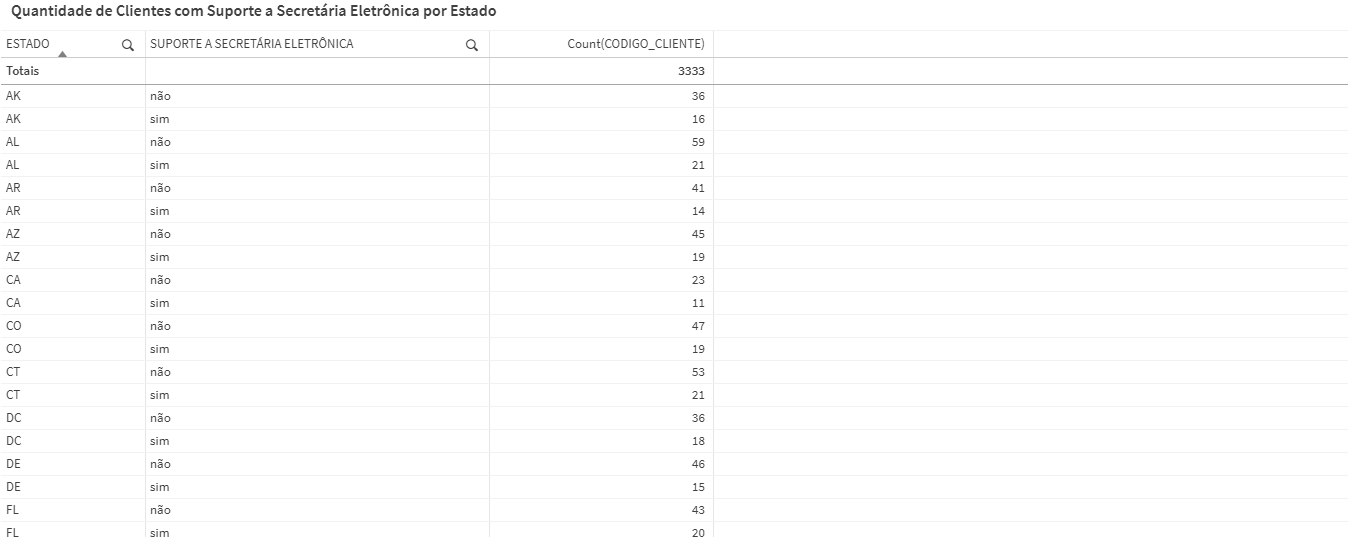

In [36]:
# Tabela com Quantidade de Clientes com Suporte a Secretária Eletrônica por Estado
Image.open('imagens/exploracaoClientes24.png')

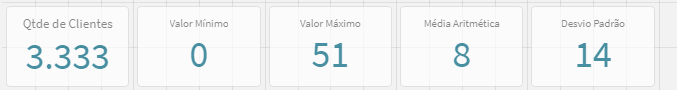

In [37]:
# Exploração da varíavel numérica number_vmail_messages, que é NÚMERO DE MENSAGENS DA SECRETÁRIA
Image.open('imagens/exploracaoClientes25.PNG')

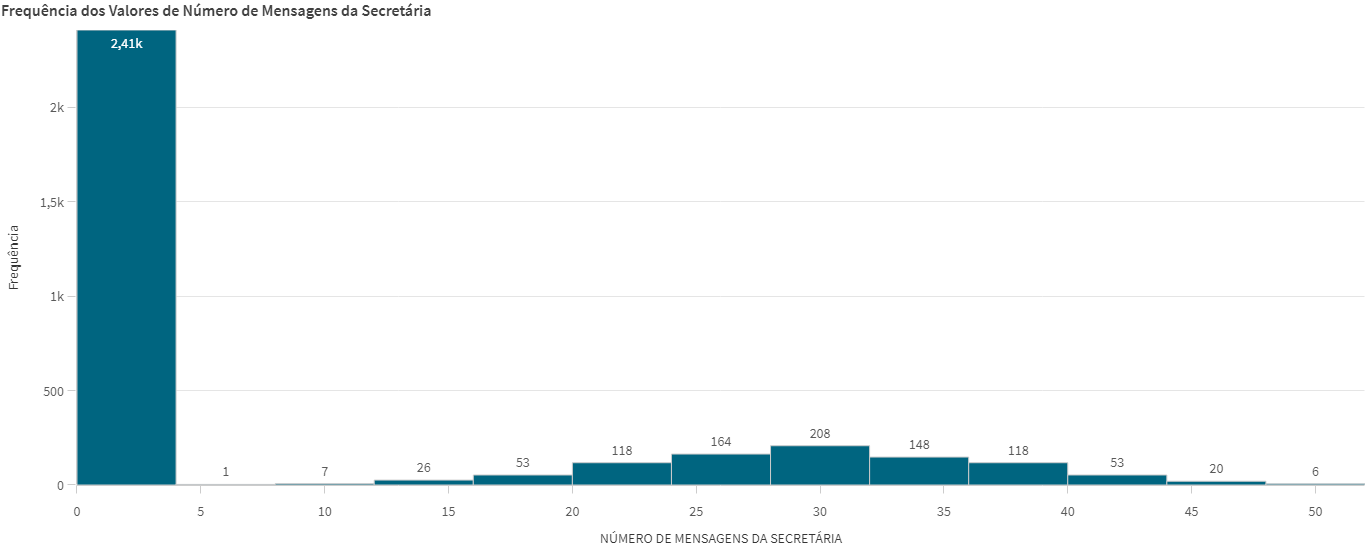

In [38]:
# Histograma - Frequência dos Valores de Número de Mensagens da Secretária Eletrônica
Image.open('imagens/exploracaoClientes26.png')

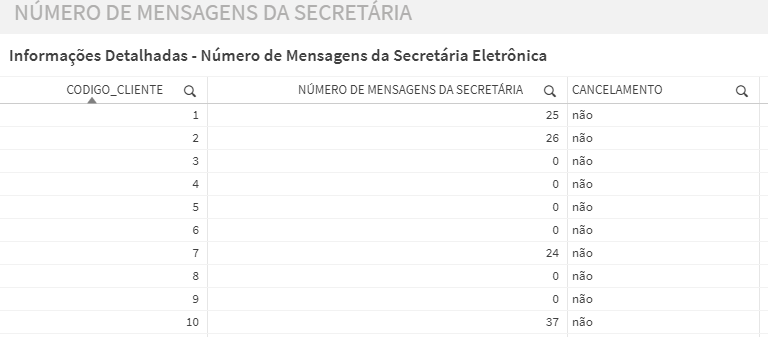

In [39]:
# Visualizando alguns registros.
Image.open('imagens/exploracaoClientes27.PNG')

Continuação da exploração dos dados usando Python e Matplot lib.

In [40]:
# Exploração da varíavel numérica number_vmail_messages
clientes.number_vmail_messages.head(5)

0    25
1    26
2     0
3     0
4     0
Name: number_vmail_messages, dtype: int64

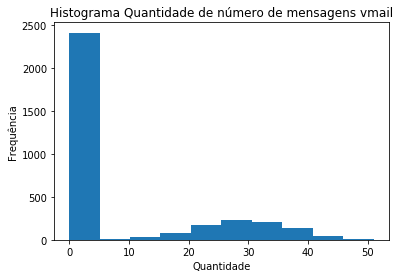

In [41]:
fig, ax1 = ply.subplots()
ax1.hist(clientes.number_vmail_messages)
ply.title('Histograma Quantidade de número de mensagens vmail')
ply.xlabel('Quantidade')
ply.ylabel('Frequência')         
ply.show()

In [42]:
# Exploração da variável numérica total_day_minutes
clientes.total_day_minutes.head(5)

0    265.1
1    161.6
2    243.4
3    299.4
4    166.7
Name: total_day_minutes, dtype: float64

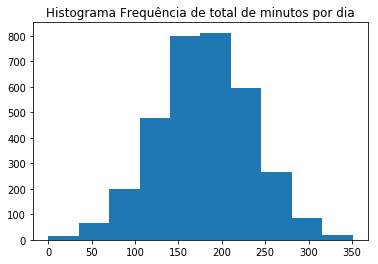

In [43]:
# Histograma
fig, ax1 = ply.subplots()
ax1.hist(clientes.total_day_minutes)
ply.title('Histograma Frequência de total de minutos por dia')
ply.show()

In [44]:
# Estados e o somatório das de total_day_minutes
agrupamentoEstado = clientes.groupby(by = ['state']).sum()
agrupamentoEstado['total_day_minutes'].sort_values(ascending = False)

state
WV    18438.8
MN    15401.8
AL    14880.8
NY    14534.5
OH    14295.4
WI    13972.2
IN    13953.3
WY    13873.1
MD    13806.0
OR    13747.2
VA    13647.8
KS    13408.9
NJ    13343.3
VT    13288.3
UT    13217.0
MI    13183.3
TX    13069.2
ID    13039.2
CT    12960.4
NC    12589.9
MT    11832.5
WA    11797.0
CO    11795.0
MA    11706.7
NV    11644.1
ND    11615.0
MS    11565.4
ME    11486.3
SD    11381.4
FL    11310.6
AZ    10982.7
OK    10974.5
RI    10886.1
NE    10825.4
MO    10741.9
DE    10649.6
NM    10628.6
KY    10251.5
IL    10068.3
GA     9991.4
SC     9986.5
NH     9930.4
AR     9686.4
HI     9326.0
TN     9315.9
AK     9276.0
DC     9254.5
LA     9097.2
PA     8476.9
IA     7815.0
CA     6241.2
Name: total_day_minutes, dtype: float64

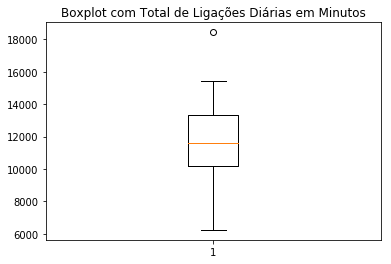

In [45]:
fig, ax1 = ply.subplots()
ax1.boxplot(agrupamentoEstado['total_day_minutes'].sort_values(ascending = False))
ply.title("Boxplot com Total de Ligações Diárias em Minutos")
ply.show()

In [46]:
# Estados que possuem maior número total_day_minutes
top5MaiorTotalDayMinutes = agrupamentoEstado['total_day_minutes'].sort_values(ascending = False).head(5)
top5MaiorTotalDayMinutes

state
WV    18438.8
MN    15401.8
AL    14880.8
NY    14534.5
OH    14295.4
Name: total_day_minutes, dtype: float64

In [47]:
top5MaiorTotalDayMinutes.values

array([18438.8, 15401.8, 14880.8, 14534.5, 14295.4])

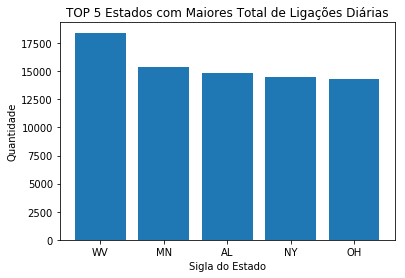

In [48]:
# Gŕafico de barras
fig, ax1 = ply.subplots()
labels = top5MaiorTotalDayMinutes.index
ax1.bar(labels,top5MaiorTotalDayMinutes.values)
ply.title('TOP 5 Estados com Maiores Total de Ligações Diárias')
ply.xlabel('Sigla do Estado')
ply.ylabel("Quantidade")
ply.show()

In [49]:
# Exploração da variável categórica 'clientes.total_day_calls'
clientes.total_day_calls

0       110
1       123
2       114
3        71
4       113
5        98
6        88
7        79
8        97
9        84
10      137
11      127
12       96
13       88
14       70
15       67
16      139
17      114
18       66
19       90
20      117
21       89
22      112
23      103
24       86
25       76
26      115
27       73
28      109
29      117
       ... 
3303     88
3304    114
3305    127
3306    131
3307    109
3308     87
3309    112
3310     91
3311     94
3312    130
3313    128
3314     81
3315    106
3316    111
3317     90
3318    131
3319     99
3320    101
3321    118
3322    105
3323    126
3324    114
3325     99
3326    128
3327     98
3328     77
3329     57
3330    109
3331    105
3332    113
Name: total_day_calls, Length: 3333, dtype: int64

In [50]:
clientes.total_day_calls.describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: total_day_calls, dtype: float64

In [51]:
# Convertendo a variável preditora
clientes['churn'] = clientes['churn'].replace("yes",1)
clientes['churn'] = clientes['churn'].replace("no",0)
clientes['churn'] = clientes['churn'].astype(int)

In [52]:
# Transformação: Removendo a coluna 'id' já que não iremos precisar para o modelo preditivo
clientes = clientes.drop(columns = 'id')

In [53]:
clientes.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [54]:
# Correlação entre as variáveis
clientes.corr()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
account_length,1.000000,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
international_plan,0.024735,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice_mail_plan,0.002918,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number_vmail_messages,-0.004628,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total_day_minutes,0.006216,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total_day_calls,0.038470,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total_day_charge,0.006214,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total_eve_minutes,-0.006757,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total_eve_calls,0.019260,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total_eve_charge,-0.006745,0.019106,0.021559,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786


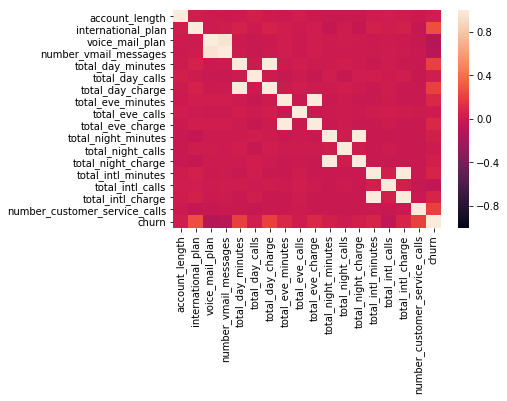

In [55]:
# Gráfico de correlação
sns.heatmap(clientes.corr(), vmin = -1, vmax = 1)

In [56]:
clientes.head(4)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0


In [57]:
# Retirando o state porque é inrelevante para o modelo.
clientes = clientes.drop(columns = 'state')

### Construção do Modelo Preditivo

In [58]:
# Divisão das variáveis em preditoras e target
clientesVarPreditoras = clientes.iloc[:,0:18]
clientesVarTarget = clientes.iloc[:,18]

In [59]:
# Conferindo o dataset criado: variáveis preditoras
clientesVarPreditoras.head(5)

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [60]:
# Conferindo o dataset criado: variável target
clientesVarTarget.head(5)

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [61]:
## Descobrindo as variáveis mais importantes para o modelo preditivo
model = DecisionTreeClassifier()
model.fit(clientesVarPreditoras, clientesVarTarget)

DecisionTreeClassifier()

In [62]:
importancia = model.feature_importances_
listaImportancia = sorted(list(importancia))
for i,v in enumerate(importancia):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.03232
Feature: 1, Score: 0.00830
Feature: 2, Score: 0.07417
Feature: 3, Score: 0.00712
Feature: 4, Score: 0.05990
Feature: 5, Score: 0.09437
Feature: 6, Score: 0.01492
Feature: 7, Score: 0.18460
Feature: 8, Score: 0.07364
Feature: 9, Score: 0.01992
Feature: 10, Score: 0.06589
Feature: 11, Score: 0.03399
Feature: 12, Score: 0.01828
Feature: 13, Score: 0.02443
Feature: 14, Score: 0.08840
Feature: 15, Score: 0.06986
Feature: 16, Score: 0.02133
Feature: 17, Score: 0.10857


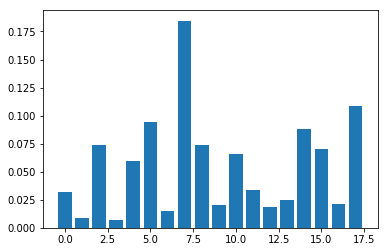

In [63]:
# Gráfico com as variáveis e o grau de importância de cada uma
ply.bar([x for x in range(len(importancia))], importancia)
ply.show()
# feature 7 = 0.155
# feature 5 = 0.120
# feature 17 = 0.107
# feature 16 = 0.095
# feature 8 = 0.031

In [64]:
# total_day_charge
clientesVarPreditoras.iloc[:,7].head(3)

0    45.07
1    27.47
2    41.38
Name: total_day_charge, dtype: float64

In [65]:
# total_day_minutes
clientesVarPreditoras.iloc[:,5].head(3)

0    265.1
1    161.6
2    243.4
Name: total_day_minutes, dtype: float64

In [66]:
# number_customer_service_calls
clientesVarPreditoras.iloc[:,17].head(3)

0    1
1    1
2    0
Name: number_customer_service_calls, dtype: int64

In [67]:
# total_intl_charge
clientesVarPreditoras.iloc[:,16].head(3)

0    2.70
1    3.70
2    3.29
Name: total_intl_charge, dtype: float64

In [68]:
# total_eve_minutes
clientesVarPreditoras.iloc[:,8].head(3)

0    197.4
1    195.5
2    121.2
Name: total_eve_minutes, dtype: float64

<h2> Aplicação de Padronização. </h2> 

In [69]:
# Padronização, normalização?
# Iremos aplicar Padronização, para que os dados tenha uma distribuição
# normal, isto é: média igual a 0 e desvio padrão 1. O algoritmo de
# regressão logística espera receber os dados nesse formato.

In [70]:
# Gerando o novo padrão
scaler = StandardScaler().fit(clientesVarPreditoras)
standardX = scaler.transform(clientesVarPreditoras)

In [71]:
# Função inversa
#scaler.inverse_transform(standardX)

Dados Originais: 

 [[128 '415' 0 ... 3 2.7 1]
 [107 '415' 0 ... 3 3.7 1]
 [137 '415' 0 ... 5 3.29 0]
 ...
 [28 '510' 0 ... 6 3.81 2]
 [184 '510' 1 ... 10 1.35 2]
 [74 '415' 0 ... 4 3.7 0]]

 Dados Padronizados: 

 [[ 0.67648946 -0.52360328 -0.32758048  1.6170861   1.23488274  1.56676695
   0.47664315  1.56703625 -0.07060962 -0.05594035 -0.07042665  0.86674322
  -0.46549436  0.86602851 -0.08500823 -0.60119509 -0.0856905  -0.42793202]
 [ 0.14906505 -0.52360328 -0.32758048  1.6170861   1.30794844 -0.33373776
   1.12450284 -0.33401297 -0.10808036  0.14486653 -0.10754944  1.05857074
   0.14782467  1.05938994  1.24048169 -0.60119509  1.2411686  -0.42793202]
 [ 0.9025285  -0.52360328 -0.32758048 -0.61839626 -0.59175986  1.16830364
   0.67598459  1.168464   -1.57338336  0.49627857 -1.57389963 -0.75686906
   0.19893459 -0.75557074  0.70312091  0.21153386  0.69715637 -1.1882185 ]
 [-0.42859027 -0.68883427  3.05268496 -0.61839626 -0.59175986  2.19659605
  -1.46693591  2.19675881 -2.74286476 -0.6

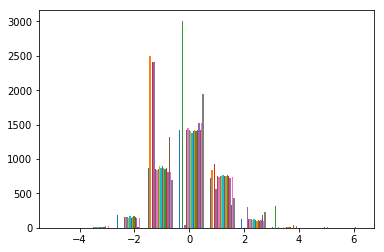

In [72]:
# Sumarizando os dados transformados
print("Dados Originais: \n\n", clientesVarPreditoras.values)
print("\n Dados Padronizados: \n\n", standardX[0:5,:])
# Comprovando que estamos diante de uma distribuição normal
ply.hist(standardX)
print('Media %3.2f' % math.fabs(standardX.mean()))
print('Desvio padrão %d ' % np.std(standardX))

Divisão entre dados de treino e teste. Não usaremos a cross-validation e sim uma divisão estatística, sendo 60% para o dados de treino e 40% para dados de teste. X representa os dados das variáveis preditoras, Y os dados das variável alvo, ambos presentes tanto em treino como em teste.

In [73]:
# Divisão entre dados de treino e teste
clientesXTreino, clientesXTeste, clientesYTreino, clientesYTeste = train_test_split(standardX,clientesVarTarget, test_size = 0.4,random_state = 0)

In [74]:
# Convertendo para o formato original para fins de interpretação e avaliação do modelo preditivo
standXOrigional = scaler.inverse_transform(standardX)
standXOrigional = pd.DataFrame(standXOrigional)

In [75]:
# Exemplo de registros para TREINO do modelo 
standXOrigional.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,128.0,415.0,0.0,1.0,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0
1,107.0,415.0,0.0,1.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0
2,137.0,415.0,0.0,0.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0
3,84.0,408.0,1.0,0.0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0
4,75.0,415.0,1.0,0.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0


In [76]:
# Exemplo de registros para TESTE do modelo, convertendo de padronizado para normal para fins de avaliação e interpretação do modelo preditivo
pd.DataFrame(scaler.inverse_transform(clientesXTeste)).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,92.0,415.0,1.0,0.0,0.0,264.3,91.0,44.93,160.9,115.0,13.68,198.6,73.0,8.94,9.3,5.0,2.51,0.0
1,112.0,510.0,0.0,1.0,36.0,113.7,117.0,19.33,157.5,82.0,13.39,177.6,118.0,7.99,10.0,3.0,2.70,2.0
2,69.0,510.0,0.0,0.0,0.0,195.3,70.0,33.20,216.7,108.0,18.42,259.9,119.0,11.70,12.5,4.0,3.38,3.0
3,95.0,415.0,0.0,0.0,0.0,175.2,91.0,29.78,244.4,109.0,20.77,75.8,95.0,3.41,7.5,2.0,2.03,1.0
4,115.0,510.0,1.0,0.0,0.0,345.3,81.0,58.70,203.4,106.0,17.29,217.5,107.0,9.79,11.8,8.0,3.19,1.0


### Modelo Regressão Logística

In [77]:
# Modelo 1. Como se trata de classificação, podemos utilizar o modelo de regressão logística. Ele mede a relação
# entre a variável dependente categórica (alvo) e suas variáveis preditoras independentes usando uma função.
modelo1 = LogisticRegression(random_state=0,max_iter=10000).fit(clientesXTreino,clientesYTreino)

In [78]:
# Efetuando as previsões
modelo1Previsoes = modelo1.predict(clientesXTeste)
modelo1Previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
type(modelo1Previsoes)

numpy.ndarray

In [80]:
# Avaliando a acurácia do modelo usando o dados de teste. Acurácia significa quantas previsões o modelo acertou corretamente. 
# Precisão é entre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas;
print("Acurácia: %3.2f" % metrics.accuracy_score(modelo1Previsoes,clientesYTeste ))
print("Precisão: %3.2f" % metrics.precision_score(modelo1Previsoes, clientesYTeste))

Acurácia: 0.87
Precisão: 0.20


In [81]:
# Confusion matrix
matrixConfModelo1 = metrics.confusion_matrix(clientesYTeste,modelo1Previsoes)
matrixConfModelo1

array([[1120,   32],
       [ 145,   37]])

In [82]:
def construirGraficoMatrix(matrix):
    class_names=[0,1] # número de classes
    fig, ax = ply.subplots()
    tick_marks = np.arange(len(class_names))
    ply.xticks(tick_marks, class_names)
    ply.yticks(tick_marks, class_names)
    # heatmap
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    ply.tight_layout()
    ply.title('Confusion matrix', y=1.1)
    ply.ylabel('Valores atuais')
    ply.xlabel('Valores previstos')   

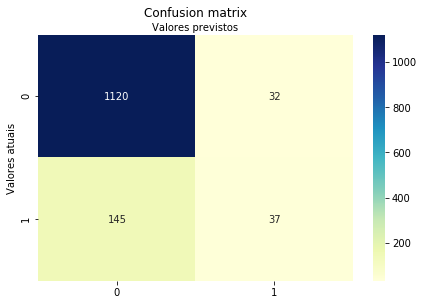

In [83]:
construirGraficoMatrix(matrixConfModelo1)

### Modelo RandomForest

In [84]:
modelo2 = RandomForestClassifier().fit(clientesXTreino,clientesYTreino)

In [85]:
previsoesModelo2 = modelo2.predict(clientesXTeste)

In [86]:
print('Acurácia do modelo',metrics.accuracy_score(previsoesModelo2,clientesYTeste) * 100)
print("Precisão:", metrics.precision_score(previsoesModelo2, clientesYTeste) * 100)

Acurácia do modelo 95.65217391304348
Precisão: 76.37362637362637


In [87]:
# Confusion matrix
matrixConfModelo2 = metrics.confusion_matrix(clientesYTeste,previsoesModelo2)
matrixConfModelo2

array([[1137,   15],
       [  43,  139]])

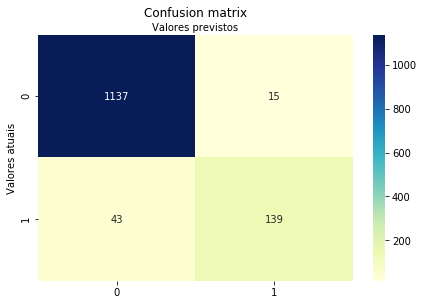

In [88]:
construirGraficoMatrix(matrixConfModelo2)

### Modelo KNN

In [89]:
modelo3 = KNeighborsClassifier(n_neighbors = 3).fit(clientesXTreino,clientesYTreino)

In [90]:
previsoesModelo3 = modelo3.predict(clientesXTeste)

In [91]:
previsoesModelo3

array([0, 0, 0, ..., 0, 0, 0])

In [92]:
print (pd.crosstab(clientesYTeste,previsoesModelo3, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        1124   28  1152
1          98   84   182
All      1222  112  1334


In [93]:
# Confusion matrix
matrixConfModelo3 = metrics.confusion_matrix(clientesYTeste,previsoesModelo3)
matrixConfModelo3

array([[1124,   28],
       [  98,   84]])

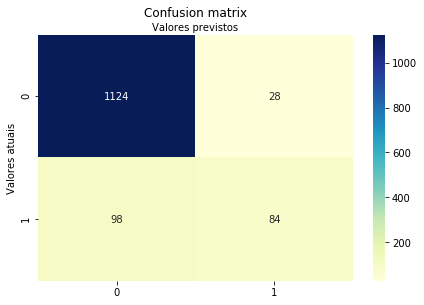

In [94]:
construirGraficoMatrix(matrixConfModelo3)

In [95]:
print('Acurácia do modelo',metrics.accuracy_score(previsoesModelo3,clientesYTeste) * 100)
print("Precisão:", metrics.precision_score(previsoesModelo3, clientesYTeste) * 100)

Acurácia do modelo 90.55472263868066
Precisão: 46.15384615384615


In [96]:
# O melhor modelo foi RandomForest!

### Otimização do Modelo Preditivo

1. Técnica de Hyperparâmetros.
2. Feature Selection.

In [97]:
valores_grid = {'max_depth': [10,25,50,100]}

In [98]:
# Criando o grid
grid = GridSearchCV(estimator = modelo2, param_grid = valores_grid)
grid.fit(clientesXTreino,clientesYTreino)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 25, 50, 100]})

In [99]:
# Print do resultado
print("Acurácia: %.3f" % (grid.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", grid.best_estimator_)

Acurácia: 94.798
Melhores Parâmetros do Modelo:
 RandomForestClassifier(max_depth=100)


In [100]:
modelo4 = RandomForestClassifier(max_depth = 50).fit(clientesXTreino,clientesYTreino)

In [101]:
previsoesModelo4 = modelo4.predict(clientesXTeste)

In [102]:
print('Acurácia do modelo',metrics.accuracy_score(previsoesModelo4,clientesYTeste) * 100)
print("Precisão:", metrics.precision_score(previsoesModelo4, clientesYTeste) * 100)
# Ouve uma sutil de melhora do modelo.

Acurácia do modelo 95.4272863568216
Precisão: 77.47252747252747


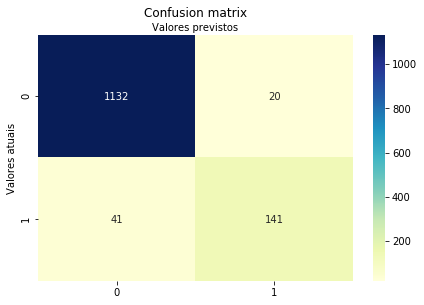

In [103]:
# Confusion matrix
matrixConfModelo4 = metrics.confusion_matrix(clientesYTeste,previsoesModelo4)
matrixConfModelo4
construirGraficoMatrix(matrixConfModelo4)

### Deploy do Modelo Preditivo

In [104]:
# Persistir o melhor modelo no disco
dump(modelo4,'modelo4.pk1')

['modelo4.pk1']

In [105]:
# Listando os arquivos em disco
!ls

appChurchTelecom     imagens	  Projeto04.pdf
appChurchTelecom.py  image.png	  ProjetoChurnTelecom.ipynb
datasets	     modelo4.pk1  ProjetoTelecomChurn2.ipynb


In [106]:
# Carregando o modelo a partir do disco
modelo4Carregado = load('modelo4.pk1')

In [107]:
# Atributos do modelo
print("Atributos do Modelo:\n\nClasses:{}\n\nEstimators:{}\n\nParametros:{}".
      format(modelo4Carregado.classes_,modelo4Carregado.n_estimators,modelo4Carregado.base_estimator))

Atributos do Modelo:

Classes:[0 1]

Estimators:100

Parametros:DecisionTreeClassifier()


In [108]:
# Dataset usado para o treino
pd.DataFrame(scaler.inverse_transform(clientesXTreino)).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,123.0,415.0,0.0,1.0,33.0,146.6,87.0,24.92,114.8,59.0,9.76,220.4,99.0,9.92,2.9,7.0,0.78,0.0
1,59.0,510.0,0.0,1.0,29.0,133.1,114.0,22.63,221.2,82.0,18.80,131.6,103.0,5.92,6.8,3.0,1.84,1.0
2,115.0,415.0,0.0,0.0,0.0,245.0,97.0,41.65,250.7,75.0,21.31,270.2,124.0,12.16,13.7,8.0,3.70,1.0
3,121.0,510.0,0.0,1.0,28.0,110.0,94.0,18.70,141.5,76.0,12.03,237.3,87.0,10.68,6.4,3.0,1.73,2.0
4,139.0,510.0,0.0,1.0,23.0,157.6,129.0,26.79,247.0,96.0,21.00,259.2,112.0,11.66,13.7,2.0,3.70,0.0


In [109]:
# Simulando novos dados
dadosNovo = np.array([[100,500,0.0,1.0,35,150,80,30,115,60,10,150,100,12,10,8,4,0.0]])

In [110]:
type(dadosNovo)

numpy.ndarray

In [111]:
# Efetuando uma previsão
modelo4Carregado.predict(dadosNovo)

array([0])

In [112]:
type(modelo4Carregado.predict(dadosNovo))

numpy.ndarray

In [113]:
len(modelo4Carregado.predict(dadosNovo))
# Modelo está pronto e preparado para o deploy, assim como receber novos dados.

1